<a href="https://colab.research.google.com/github/mikah10/SIS420/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regresion Lineal Multivariable**

**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

**Montar Google Drive en Colab para acceder a los archivos**

In [ ]:
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


**Lectura Dataset**

In [ ]:
#Leyendo el dataset
df = pd.read_csv('/content/mydrive/MyDrive/machine learning/datasets/Wine/winequality-red.csv', sep=';')

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)


**Dataset**

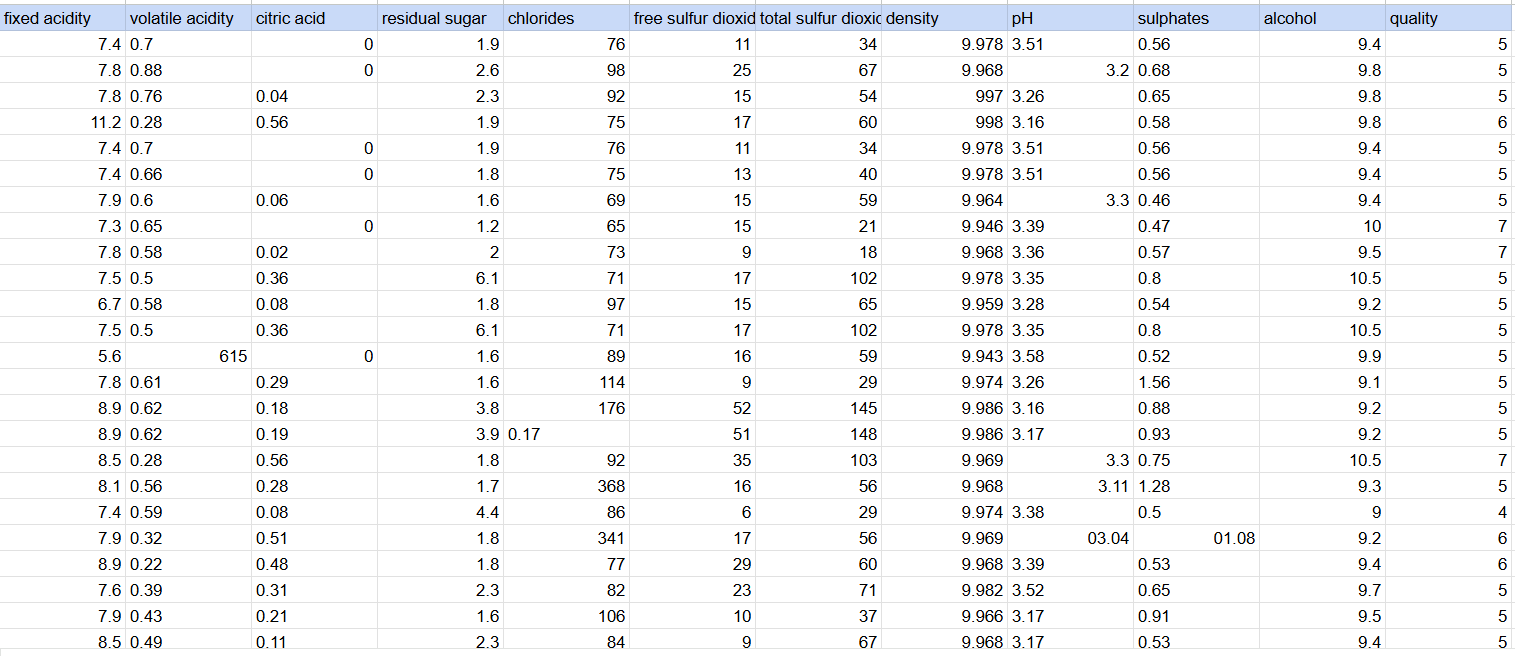

**Normalización**

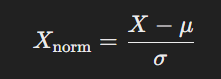

In [ ]:
# Seleccionando las 11 variables de entrada
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']

X = df[feature_cols].values #Matriz de caracteríaticas
y = df['quality'].values #Variable objetivo

# Función para normalizar
def normalize_features(X):
    means = np.mean(X, axis=0)  # Media de cada columna
    stds = np.std(X, axis=0)  # Desviación estándar de cada columna
    normalized_X = (X - means) / stds  # Normalización: (valor - media) / desviación estándar
    return normalized_X, means, stds


# Normalizando X
X_norm, means, stds = normalize_features(X)
print("Primeras 5 filas de X_norm:")
print(X_norm[:5, :])
# Agregar una columna de unos para el término de sesgo (intercepto)
X_norm = np.column_stack((np.ones(X_norm.shape[0]), X_norm))
print("\nPrimeras 5 filas de X_norm con unos (theta 0)")
print(X_norm[:5, :])

# Inicializando el vector de parámetros theta con ceros
n_features = X_norm.shape[1] # Número de características (incluyendo el término de sesgo)
theta = np.zeros(n_features)

Primeras 5 filas de X_norm:
[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]

Primeras 5 filas de X_norm con unos (theta 0)
[[ 1.         -0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669
  -0.46619252 -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [ 1.         -0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752
   0.87263823  0.

**Función de Costo**

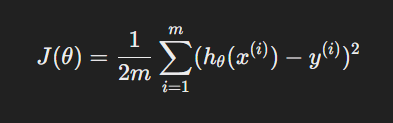

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)  # Número de ejemplos
    predictions = X.dot(theta) # Predicciones del modelo
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))  # Fórmula del error cuadrático medio
    return cost

**Descenso de Gradiente**

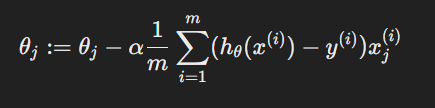

In [ ]:
iterations = 1000 # Número de iteraciones
alpha = 0.01 # Tasa de aprendizaje
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = [] # Lista para almacenar el costo en cada iteración

    for i in range(iterations):
        prediction = X.dot(theta)  # Predicciones actuales
        theta = theta - (alpha/m) * (X.T.dot(prediction - y)) # Actualización de theta
        cost_history.append(compute_cost(X, y, theta))  # Guardar el costo actual

    return theta, cost_history

theta_gd, cost_history = gradient_descent(X_norm, y, theta, alpha, iterations)

**Gráfico de convergencia del costo**

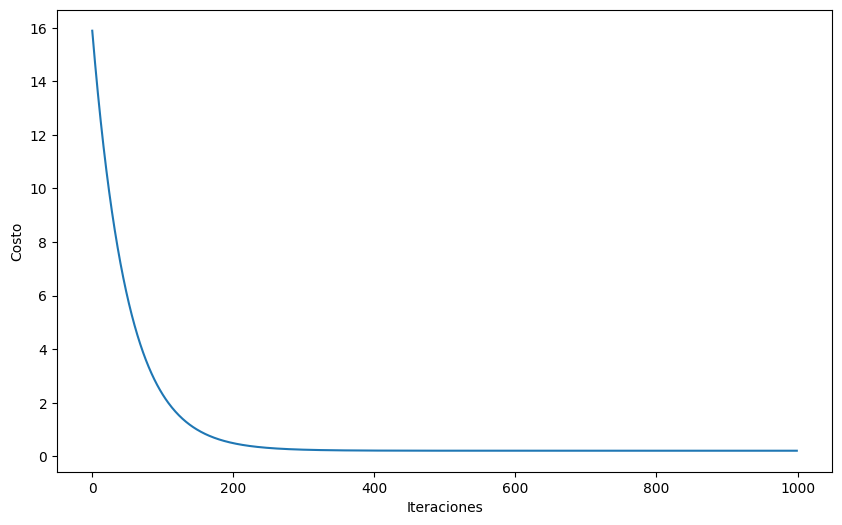

In [ ]:
# Graficando la convergencia del costo
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.savefig('/content/mydrive/MyDrive/machine learning/datasets/Wine/Imagenes')   # Guardar la imagen
plt.show()
plt.close()


**Predicción**

In [ ]:
# Función para predecir la calidad del vino
def predict(features, theta, means, stds):
    # Normalizar las características
    features_norm = (features - means) / stds
    # Agregar el término de sesgo
    features_norm = np.column_stack((np.ones(features_norm.shape[0]), features_norm))
    # Retornar la predicción
    return features_norm.dot(theta)

# Probando la predicción con una muestra de vino
sample_wine = np.array([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51,0.84, 9.4]])
predicted_quality = predict(sample_wine, theta_gd, means, stds)

print(f"Predicted quality: {predicted_quality[0]:.2f}")



Predicted quality: 5.29


**Gráfico de la Distribución de la Variable Objetivo**

Ayuda a ver cómo están distribuidos los valores de quality, lo cual es
importante para entender la variabilidad de los datos y posibles sesgos.

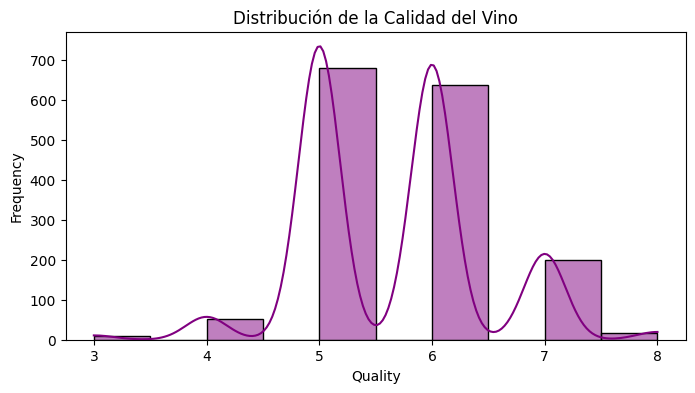

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=10, kde=True, color='purple')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribución de la Calidad del Vino')
plt.show()

**Generación de archivos de historial**

In [ ]:
# Guardando theta en un archivo CSV
theta_df = pd.DataFrame(theta_gd, columns=['Theta'])
theta_df.to_csv('/content/mydrive/MyDrive/machine learning/datasets/Wine/Imagenes/theta.csv', index=False)

# Guardando la historia de costos en un archivo CSV
cost_history_df = pd.DataFrame(cost_history, columns=['Cost History'])
cost_history_df.to_csv('/content/mydrive/MyDrive/machine learning/datasets/Wine/Imagenes/cost.csv', index=False)

**Gráfico de barras de coeficientes**

Para visualizar qué variables influyen más en la predicción.

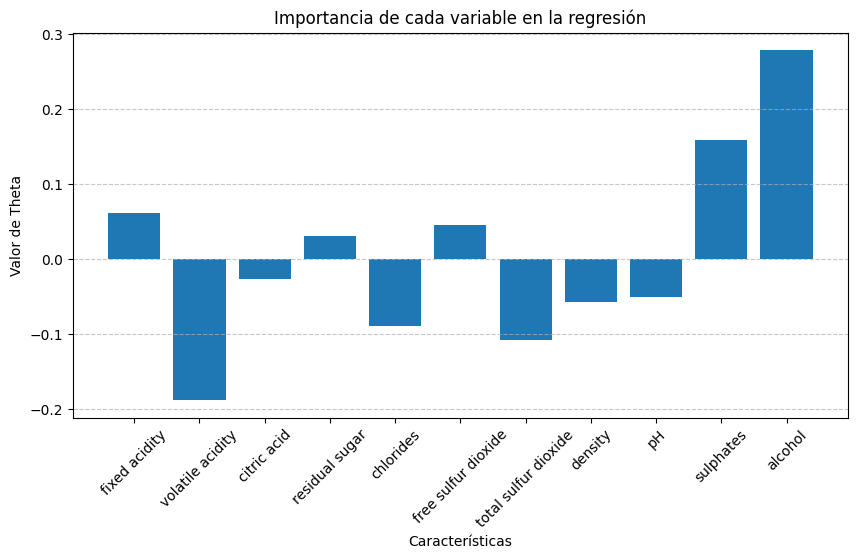

In [ ]:
import os  # Agregar esta línea

output_dir = "/content/mydrive/MyDrive/IA/Labs/Lab1/Images"
os.makedirs(output_dir, exist_ok=True)

# Gráfico de barras de coeficientes
feature_cols = df.columns[:-1]  # Excluir la columna 'quality'
plt.figure(figsize=(10, 5))
plt.bar(feature_cols, theta_gd[1:])  # Excluir intercepto
plt.xticks(rotation=45)
plt.xlabel("Características")
plt.ylabel("Valor de Theta")
plt.title("Importancia de cada variable en la regresión")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(output_dir, "importancia_variables.png"))
plt.show()
plt.close()


Si un θ es negativo, significa que a medida que esa característica aumenta, la calidad (quality) disminuye, indicando una relación inversa. Por el contrario, si es positivo, su aumento contribuye a mejorar la calidad. Cuanto mayor sea el valor absoluto de θ (ya sea positivo o negativo), mayor será su impacto en la predicción, mientras que valores cercanos a cero indican poca influencia.

**Gráficos de dispersión de cada variable en relación a la calidad**

Si los puntos siguen una tendencia clara, indica que la característica tiene una relación fuerte con la calidad; si están dispersos sin un patrón definido, su influencia es baja. Esto ayuda a identificar qué variables pueden ser más relevantes en la predicción de la calidad.

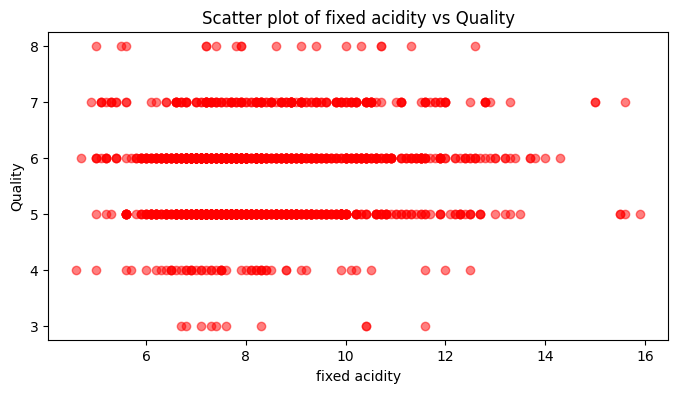

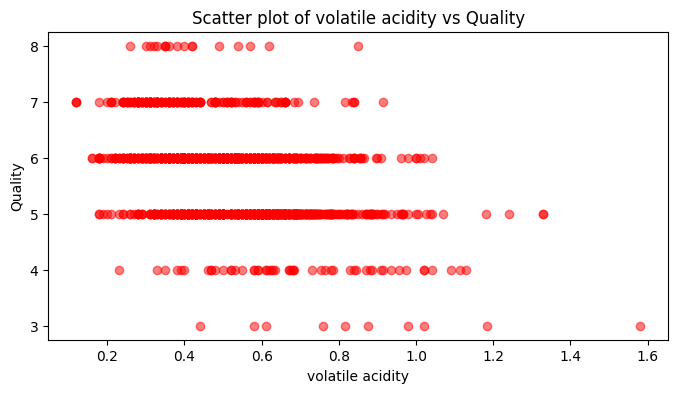

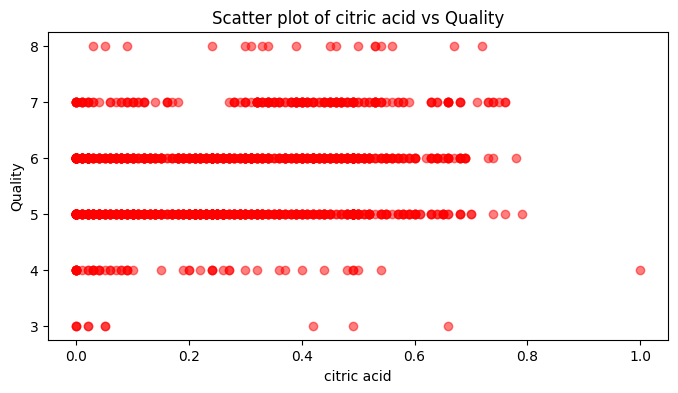

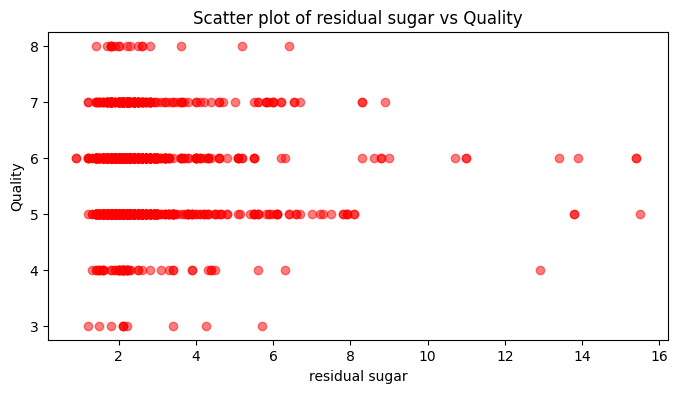

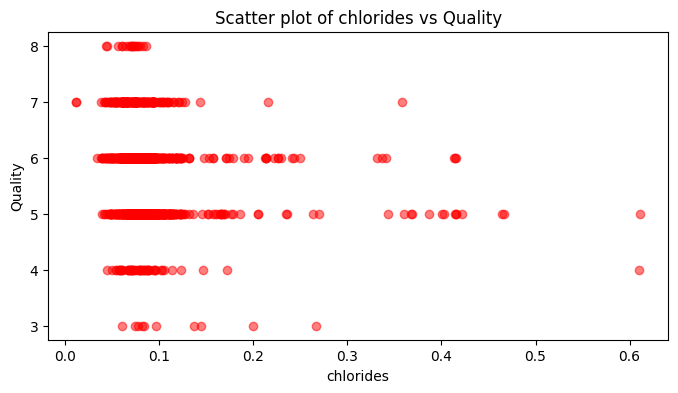

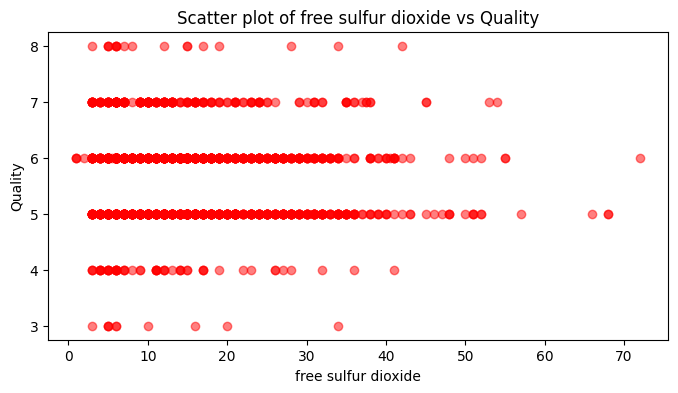

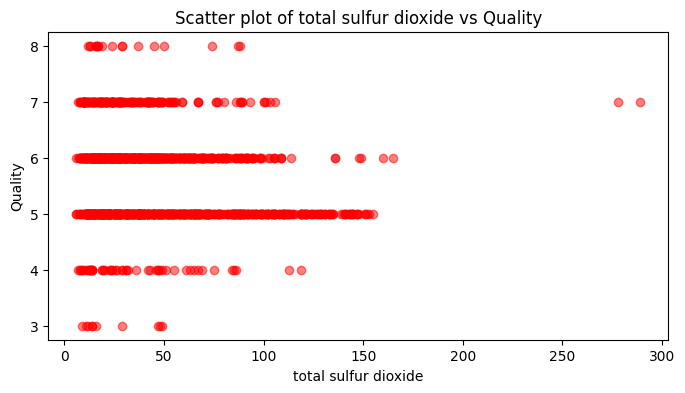

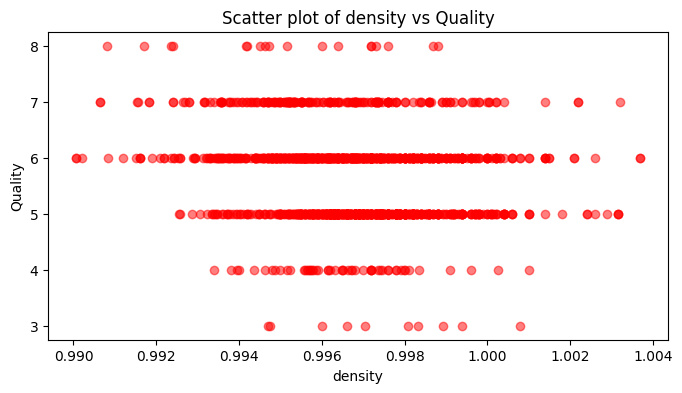

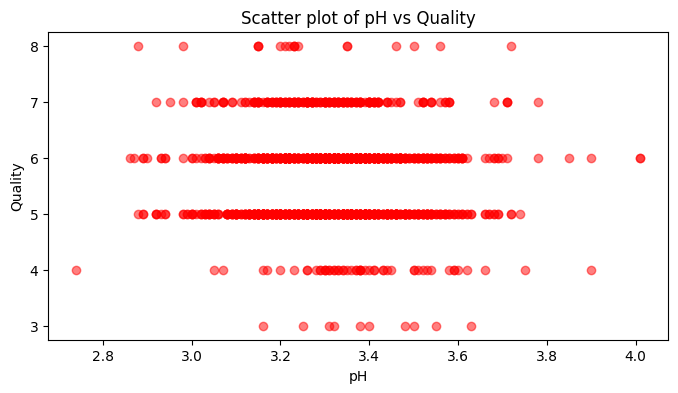

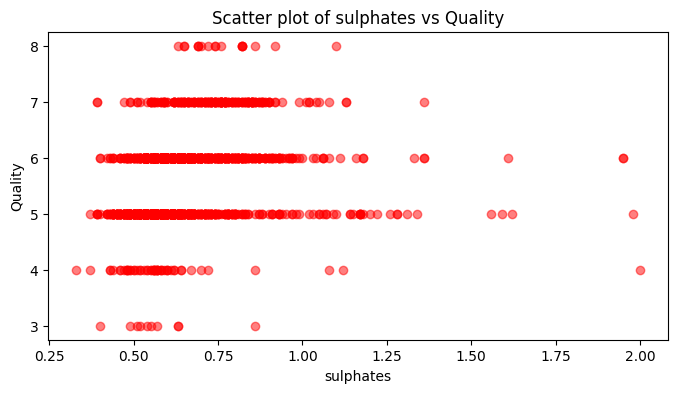

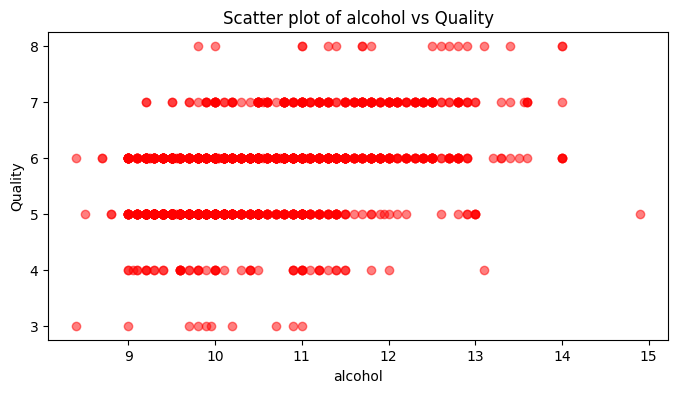

In [ ]:
output_dir = "/content/mydrive/MyDrive/machine learning/datasets/Wine/Imagenes"

# Crear la carpeta si no existe
os.makedirs(output_dir, exist_ok=True)

# Lista de columnas a graficar contra 'quality'
columns_to_plot = [col for col in df.columns if col != 'quality']

# Generar y guardar cada gráfico
for i, col in enumerate(columns_to_plot, start=1):
    plt.figure(figsize=(8, 4))
    plt.scatter(df[col], df['quality'], alpha=0.5, color='r')
    plt.title(f'Scatter plot of {col} vs Quality')
    plt.xlabel(col)
    plt.ylabel('Quality')

    # Guardar la imagen
    file_path = os.path.join(output_dir, f"grafico{i}.png")
    plt.savefig(file_path)
    plt.show()
    plt.close()  # Cerrar la figura para liberar memoria
